## Example of converting small model from snntorch to Nir and from Niro to Norse

In [ ]:
!pip install nirtorch

In [ ]:
!pip install norse

In [ ]:
!pip install snntorch

In [ ]:
import snntorch as snn
import torch
from snntorch.export_nir import export_to_nir
import norse

# Simple model on snntorch
lif1 = snn.Leaky(beta=0.9, init_hidden=True)
lif2 = snn.Leaky(beta=0.9, init_hidden=True, output=True)

net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 500),
    lif1,
    torch.nn.Linear(500, 10),
    lif2
)

sample_data = torch.randn(1, 784)

# Converting to NIR
nir_graph = export_to_nir(net, sample_data)

norse_model = norse.torch.from_nir(nir_graph)

In [ ]:
x = torch.rand(1,784)

output_spikes, output_membrane = norse_model(x)

output_spikes, output_membrane = net(x)

print("Output Spikes:", output_spikes)
print("Output Membrane Potential:", output_membrane)

## Downloading and visualising NMNIST

In [1]:
!pip install tonic

In [4]:
import tonic

to_frame = tonic.transforms.ToFrame(
    sensor_size=tonic.datasets.NMNIST.sensor_size,
    time_window=1e3
)


train_dataset = tonic.datasets.NMNIST(
    save_to=".",
    train=True,
    transform=to_frame
)

  0%|          | 0/1011893601 [00:00<?, ?it/s]

Extracting ./NMNIST/train.zip to ./NMNIST


In [3]:
import torchvision
import torch

BATCH_SIZE = 256

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data = torchvision.datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=BATCH_SIZE, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=transform,
    ),
    batch_size=BATCH_SIZE,
)

0


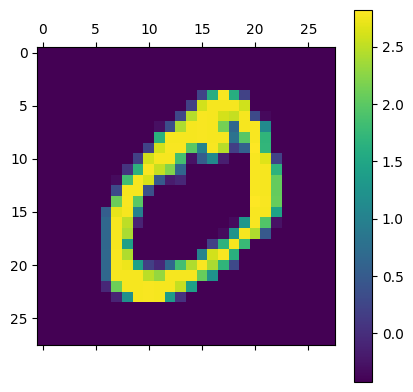

In [11]:
import matplotlib.pyplot as plt

img, label = train_data[1]

plt.matshow(img[0])
plt.colorbar()
print(label)